# Importing Necessary Modules

In [57]:
import seaborn as sns

In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,Input, GlobalAveragePooling1D
# from bnlp.corpus import stopwords
# from bnltk.tokenize import Tokenizers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Layer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score,recall_score, accuracy_score
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.models import Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix




# Getting Input and Visualization

In [7]:
resume = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")

In [8]:
resume.iloc[0]['Resume_str']

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [9]:
resume_category, resume_per_category = list(resume['Category'].value_counts().index), list(resume['Category'].value_counts().values)

In [10]:
resume_per_category

[120,
 120,
 118,
 118,
 118,
 118,
 118,
 117,
 117,
 116,
 115,
 115,
 115,
 112,
 111,
 110,
 107,
 103,
 102,
 97,
 96,
 63,
 36,
 22]

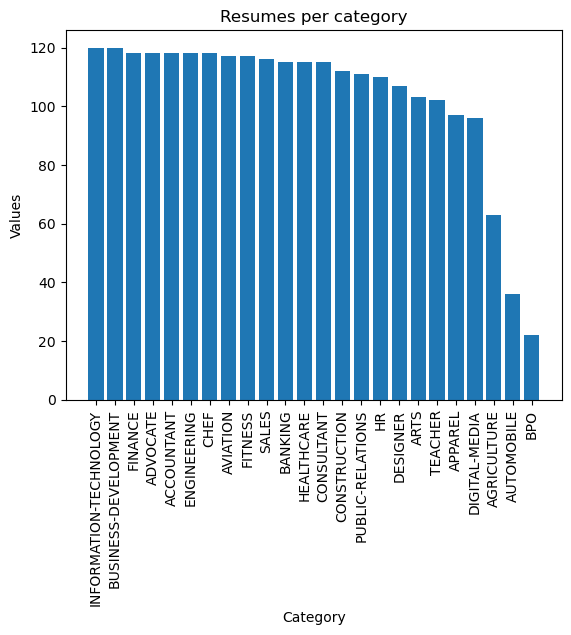

In [11]:
plt.bar(resume_category, resume_per_category)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation = 90)
plt.title('Resumes per category')

# Display the chart
plt.show()

# Text Preprocessing

In [12]:
def text_preprocess(text):
#     processed_array = []
    # emoji_pattern = re.compile("["
    #                        u"\U0001F600-\U0001F64F" 
    #                        u"\U0001F300-\U0001F5FF"  
    #                        u"\U0001F680-\U0001F6FF"            
    #                        u"\u2000-\u206F"
    #                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    #                        "]+", flags=re.UNICODE)
    # text = emoji_pattern.sub(r'',text)
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'[0-9]', ' ', text)
    text = remove_punctuation(text)
    words = text.split()
    process_words = []
    for word in words:
        if re.match(r'^[a-zA-Z]+$', word):
            process_words.append(word.lower())
        else:
            process_words.append(word)
    
    return ' '.join(process_words)

In [13]:
def remove_punctuation(text):
    punctuations = '''“”!()-[]{};:'"\,<>./?@#$%^&*_~�।’‘Ôø√ºß√√≥'''
    review = text.replace('\n', ' ')
    no_punct = ""
    for char in review:
        if char not in punctuations:
          no_punct = no_punct + char
        else:
          no_punct += " "

    return no_punct

In [14]:
resume['resume_removed_punc'] = resume['Resume_str'].apply(text_preprocess)

In [15]:
resume.iloc[0]['resume_removed_punc']

'hr administrator marketing associate hr administrator summary dedicated customer service manager with + years of experience in hospitality and customer service management respected builder and leader of customer focused teams strives to instill a shared enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification accomplished trainer for cross server hospitality systems such as hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment experience hr administrator marketing

In [16]:
all_resume_text = ' '.join(resume['resume_removed_punc'])

In [17]:
len(all_resume_text.split())

1969460

**Stopwords are commonly used words in a language that are generally considered to be of little value in text analysis due to their high frequency and low information content.** These words, such as "and," "the," "is," "of," "in," and so on, are essential for the structure of a sentence but often contribute little to the actual meaning of the text. In many natural language processing (NLP) tasks, stopwords can be safely removed without losing much valuable information.

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def remove_stopwords(text):
    words = text.split()
    final_words = []
    for word in words:
        if word not in stop_words:
            final_words.append(word)
        
    sentence = ' '.join(final_words)
    return sentence
            
    

In [20]:
resume['resume_removed_stopwords'] = resume['resume_removed_punc'].apply(remove_stopwords)

Below can give us a good idea of length of texts in each documents.

Text(0.5, 1.0, 'Length-Frequency Distribution')

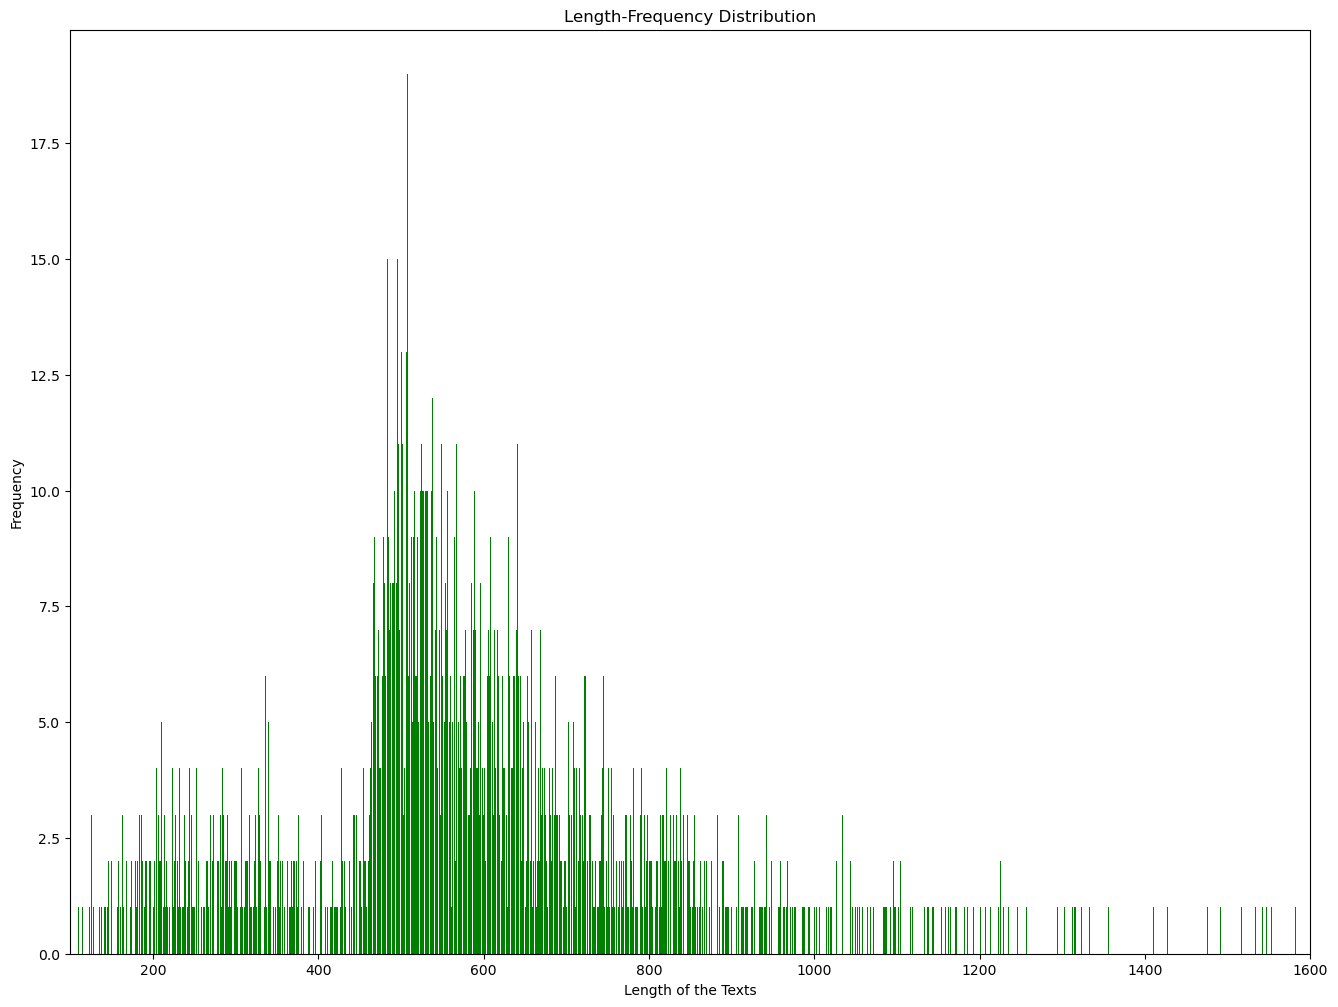

In [21]:
resume['length'] = resume['resume_removed_stopwords'].apply(lambda x:len(x.split()))
plt.figure(figsize=(16,12))
frequency = dict()
for i in resume.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="g")
plt.xlim(100, 1600)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

In [22]:
all_resume_text = ' '.join(resume['resume_removed_stopwords'])

**Wordcloud after removing stopwords**

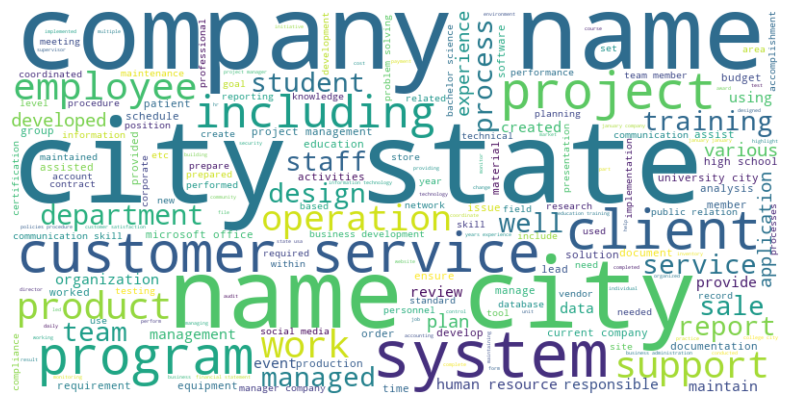

In [23]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_resume_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Tokenization

Tokenization is the process of breaking down a piece of text into smaller units called tokens. In natural language processing (NLP), tokens are typically words or subword units that form the building blocks of a sentence or text. Tokenization is a crucial step in NLP tasks because it transforms raw text into a format that can be easily processed by computers and used as input for various language processing tasks.

Below are parameters for tokenization.

oov_tok is used to replace the out of vocabulary words by "'<'OOV'>'"
    

In [24]:
vocab_size = 20000
embedding_dim = 50
max_length = 1200
trunc_type='post'
oov_tok = "<OOV>"

In [25]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(resume['resume_removed_stopwords'])
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(resume['resume_removed_stopwords'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


# test_sequences = tokenizer.texts_to_sequences(test_df['clenaed_with_punctuation'])
# testing_padded = pad_sequences(test_sequences,maxlen=max_length)

38145
Word index length:38145


In [26]:
targets = resume['Category']

In [27]:
targets.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

**For Deep learning / Machine Learning it is necessary to label encode the categorical target values to numerical values.**

In [28]:
category_labels = {
    'HR': 0,
    'DESIGNER': 1,
    'INFORMATION-TECHNOLOGY': 2,
    'TEACHER': 3,
    'ADVOCATE': 4,
    'BUSINESS-DEVELOPMENT': 5,
    'HEALTHCARE': 6,
    'FITNESS': 7,
    'AGRICULTURE': 8,
    'BPO': 9,
    'SALES': 10,
    'CONSULTANT': 11,
    'DIGITAL-MEDIA': 12,
    'AUTOMOBILE': 13,
    'CHEF': 14,
    'FINANCE': 15,
    'APPAREL': 16,
    'ENGINEERING': 17,
    'ACCOUNTANT': 18,
    'CONSTRUCTION': 19,
    'PUBLIC-RELATIONS': 20,
    'BANKING': 21,
    'ARTS': 22,
    'AVIATION': 23
}

In [29]:
resume['category_encoded'] = resume['Category'].map(category_labels)


In [30]:
resume['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [31]:
# resume['category_encoded'].value_counts()

# Train-test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(padded, resume['category_encoded'], test_size = 0.4, stratify= resume['category_encoded'], random_state=42)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1490, 1200)
(1490,)
(994, 1200)
(994,)


In [34]:
X_test,X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify= y_test, random_state=42)

**Importing word2vec :**

Word2Vec is a popular word embedding technique in natural language processing (NLP) that converts words into dense vector representations. These vector representations capture semantic relationships between words, allowing computers to understand the context and meaning of words more effectively. Word2Vec was introduced by researchers at Google in 2013 and has since become a foundational technique in NLP tasks.

In [35]:
from notebook.services.config import ConfigManager
c = ConfigManager().update('notebook', {'iopub_msg_rate_limit': 2000.0})

In [36]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [37]:
wv

Below is code for mapping similar words to a word vector using word2vec. We will use this in the embedding layer of our model.

In [38]:
word_to_vec_map = {}
x = "aa"
for i, word in enumerate(wv.index_to_key):
    temp = wv.get_vector(word)[0:50]
    word_to_vec_map[word] = temp
    if i == 1:
        print(len(temp))
    x = word
print(x, word_to_vec_map[x].shape, word_to_vec_map[x]) # From this shape we will get our embedding dimension


50
snowcapped_Caucasus (50,) [ 0.04516602 -0.04516602 -0.00393677  0.04882812  0.08837891 -0.12353516
 -0.03369141 -0.14257812 -0.12109375  0.20117188 -0.02880859  0.04760742
  0.04101562 -0.00315857  0.13378906 -0.140625   -0.12353516  0.11572266
 -0.08105469 -0.00439453 -0.04638672 -0.03222656  0.03613281  0.04394531
 -0.03393555 -0.05126953 -0.11523438  0.03088379 -0.00344849 -0.09765625
 -0.05419922  0.06103516  0.06079102  0.03222656 -0.06152344 -0.02905273
  0.00191498  0.02026367  0.11474609 -0.00346375 -0.12695312 -0.02880859
  0.04980469 -0.02685547 -0.01171875 -0.1640625   0.02661133 -0.04418945
 -0.05737305 -0.05932617]


In [39]:
print(len(word_to_vec_map))

3000000


In [40]:
%%time
frequent_words = wv.index_to_key[50:60]
for w in frequent_words:
    
      print('\n',w)
      similar_words = wv.most_similar(w, topn=3)
      for wr, vec in similar_words:
         print(wr, vec)



 can
could 0.7211957573890686
should 0.7112511992454529
must 0.7085466980934143

 It
That 0.8260787129402161
This 0.8164012432098389
It'sa 0.7155401706695557

 all
these 0.6205123662948608
those 0.5956793427467346
everyone 0.5793251991271973

 also
additionally 0.6129527688026428
meanwhile 0.5615720748901367
however 0.5468267798423767

 two
three 0.9291842579841614
four 0.8974583745002747
five 0.8395727276802063

 after
before 0.7583304047584534
After 0.6606758236885071
following 0.6543856859207153

 first
second 0.7971885800361633
third 0.6932076215744019
fourth 0.6732367277145386

 He
She 0.8116158246994019
he 0.6712614893913269
They 0.6147316694259644

 do
want 0.7385802865028381
know 0.724288284778595
not 0.7125733494758606

 time
day 0.512919008731842
moment 0.5121497511863708
days 0.49261194467544556
CPU times: user 7.87 s, sys: 2.16 s, total: 10 s
Wall time: 6.33 s


In [41]:
from keras.utils import to_categorical

# Assuming y_train is your label-encoded target array
y_train_one_hot = to_categorical(y_train, num_classes=25)
y_test_one_hot = to_categorical(y_test, num_classes = 25)


We will choose most frequent 20000 words for our model.
This can be varied. But if more word is used, there is a chance for overfitting the model.

In [42]:
max_words = 20000 # Most frequent 20000 words (It should be initialize during tokenization process)
embedding_dim = 50 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
for word, i in tokenizer.word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
         # print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

Number of words not in the vocabulary:  3078
Percentage of words not in the vocabulary:  15.39


# DEEP LEARNING

## CNN

CNN, or Convolutional Neural Network, is a deep learning architecture primarily used for image analysis and computer vision tasks. It was inspired by the structure of the human visual cortex and has been highly successful in tasks like image classification, object detection, and image segmentation. While originally designed for images, CNNs have also found applications in other domains, including natural language processing.

In [43]:
keras.backend.clear_session()

input_length = 1200


input = Input(shape=(input_length,))
embedding = Embedding(max_words, embedding_dim, input_length = 50, weights=[embedding_matrix], trainable=False)(input)
flatten = GlobalAveragePooling1D()(embedding)
dense1 = Dense(64, activation = 'relu')(flatten)
dense2 = Dense(32, activation = 'relu')(dense1)
output = Dense(24, activation = 'softmax')(dense2)

base_cnn = Model(inputs=input, outputs=output)

# model_pretrained = keras.models.Sequential([
#     keras.layers.Embedding(max_words, embedding_dim, input_length = 100, weights=[embedding_matrix], trainable=False),
#     keras.layers.GlobalAveragePooling1D(),
#     keras.layers.Dense(64, activation = tf.nn.relu),
#     keras.layers.Dense(32, activation = tf.nn.relu),
#     keras.layers.Dense(1, activation = 'sigmoid')
# ])

base_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1200)]            0         
                                                                 
 embedding (Embedding)       (None, 1200, 50)          1000000   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                             

Early stopping is used to reduce overfitting in a model. When the validation accuracy does not increase for the mentioned epoch here for patience, the model stops training.

In [44]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=300, restore_best_weights= True, mode = 'max')
base_cnn.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics =['accuracy'], )

In [45]:
X_train = np.array(X_train)
y_train = np.array(y_train)

# type(X_train)
# # type(y_train)

In [46]:

history = base_cnn.fit(X_train,y_train,epochs=1000,batch_size=64,use_multiprocessing=True, workers=8,
                               callbacks=[early_stopping], validation_data =(X_val, y_val) )

Epoch 1/1000
24/24 [==============================] - 6s 15ms/step - loss: 3.1716 - accuracy: 0.0483 - val_loss: 3.1653 - val_accuracy: 0.0644
Epoch 2/1000
24/24 [==============================] - 0s 6ms/step - loss: 3.1601 - accuracy: 0.0503 - val_loss: 3.1529 - val_accuracy: 0.0483
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 3.1471 - accuracy: 0.0711 - val_loss: 3.1389 - val_accuracy: 0.0644
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 3.1313 - accuracy: 0.0832 - val_loss: 3.1220 - val_accuracy: 0.0885
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 3.1133 - accuracy: 0.0658 - val_loss: 3.1037 - val_accuracy: 0.0805
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 3.0925 - accuracy: 0.0993 - val_loss: 3.0822 - val_accuracy: 0.0966
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 3.0686 - accuracy: 0.1128 - val_loss: 3.0553 - val_accuracy: 0.1308
Epoch

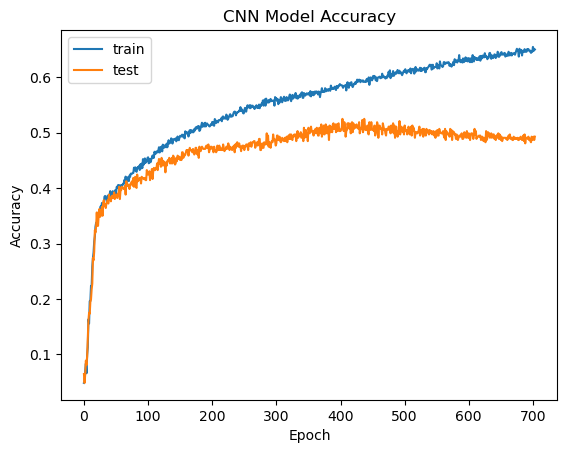

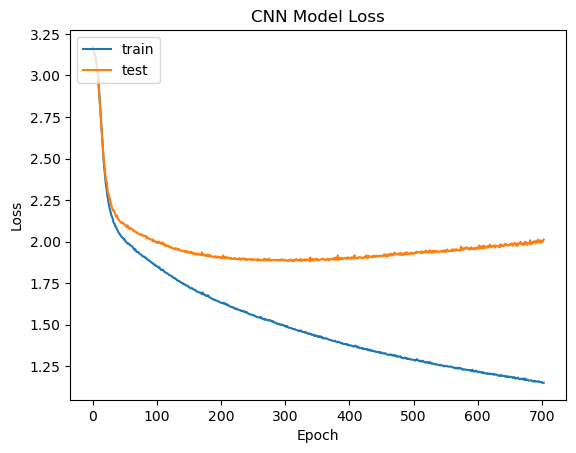

In [47]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
prediction = base_cnn.predict(X_test)

prediction = np.argmax(prediction, axis = 1)

16/16 [==============================] - 0s 2ms/step


In [63]:
# prediction

In [55]:
# y_test

1517    15
1893    18
99       0
181      1
1794    17
        ..
1873    18
1924    18
1617    16
2241    21
1171    11
Name: category_encoded, Length: 497, dtype: int64

In [72]:
print(f"CNN f1 score : {f1_score(prediction,y_test, average= 'micro')}")
print(f"CNN recall score: {recall_score(prediction, y_test, average = 'micro')}")
print(f"CNN precision score: {precision_score(prediction, y_test, average = 'micro')}")
print(f"CNN Accuracy Score: {accuracy_score(prediction, y_test)}")


CNN f1 score : 0.4788732394366197
CNN recall score: 0.4788732394366197
CNN precision score: 0.4788732394366197
CNN Accuracy Score: 0.4788732394366197


## LSTM

LSTM, which stands for Long Short-Term Memory, is a type of recurrent neural network (RNN) architecture designed to handle sequences and time-dependent data. LSTM was introduced to address the vanishing gradient problem in traditional RNNs, enabling the network to capture long-range dependencies and relationships in sequential data. LSTMs have been widely used in natural language processing, speech recognition, and time series analysis.

In [80]:
keras.backend.clear_session()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights= True, mode = 'max')
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001,
)

lstm_base = Sequential()
lstm_base.add(Embedding(max_words, embedding_dim, input_length = 1200, weights=[embedding_matrix], trainable=False))
lstm_base.add(LSTM(100))
lstm_base.add(Dropout(0.2))
lstm_base.add(Flatten())
lstm_base.add(Dense(256, activation = 'relu'))
lstm_base.add(Dense(128, activation = 'relu'))
lstm_base.add(Dense(64, activation = 'relu'))
lstm_base.add(Dense(32, activation = 'relu'))
lstm_base.add(Dropout(0.1))
lstm_base.add(Dense(24, activation= 'softmax'))


In [81]:
lstm_base.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [82]:
history = lstm_base.fit(X_train,y_train,epochs=400,batch_size=64,validation_data= (X_test, y_test),use_multiprocessing=True, workers=8,
                        callbacks= [early_stopping, reduce_lr_plateau], 
                               )

Epoch 1/400
24/24 [==============================] - 4s 73ms/step - loss: 3.1753 - accuracy: 0.0490 - val_loss: 3.1645 - val_accuracy: 0.0624 - lr: 0.0010
Epoch 2/400
24/24 [==============================] - 1s 58ms/step - loss: 3.1572 - accuracy: 0.0557 - val_loss: 3.1415 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 3/400
24/24 [==============================] - 1s 51ms/step - loss: 3.1235 - accuracy: 0.0678 - val_loss: 3.0798 - val_accuracy: 0.0865 - lr: 0.0010
Epoch 4/400
24/24 [==============================] - 1s 47ms/step - loss: 3.0354 - accuracy: 0.1107 - val_loss: 3.0122 - val_accuracy: 0.1046 - lr: 0.0010
Epoch 5/400
24/24 [==============================] - 1s 49ms/step - loss: 2.9861 - accuracy: 0.1208 - val_loss: 2.9458 - val_accuracy: 0.1247 - lr: 0.0010
Epoch 6/400
24/24 [==============================] - 1s 46ms/step - loss: 2.8630 - accuracy: 0.1544 - val_loss: 2.8692 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 7/400
24/24 [==============================] - 1s 46ms/step - lo

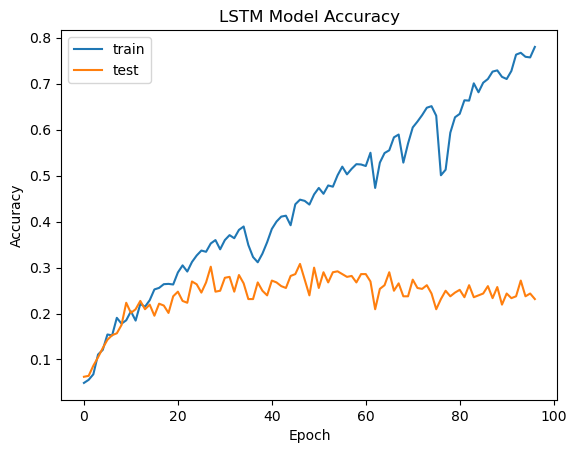

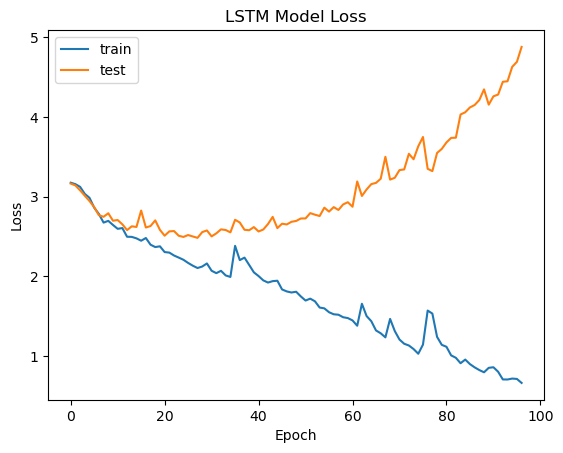

In [83]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
prediction = lstm_base.predict(X_test)

prediction = np.argmax(prediction, axis = 1)

16/16 [==============================] - 1s 22ms/step


In [85]:
print(f"LSTM f1 score : {f1_score(prediction,y_test, average= 'micro')}")
print(f"LSTM recall score: {recall_score(prediction, y_test, average = 'micro')}")
print(f"LSTM precision score: {precision_score(prediction, y_test, average = 'micro')}")
print(f"LSTM Accuracy Score: {accuracy_score(prediction, y_test)}")


LSTM f1 score : 0.30784708249496984
LSTM recall score: 0.30784708249496984
LSTM precision score: 0.30784708249496984
LSTM Accuracy Score: 0.30784708249496984


## BERT

BERT, which stands for Bidirectional Encoder Representations from Transformers, is a powerful natural language processing (NLP) model introduced by Google in 2018. BERT revolutionized NLP by pre-training on massive amounts of text data and then fine-tuning for specific tasks, achieving state-of-the-art performance on a wide range of NLP tasks without task-specific feature engineering.

### Model Input and Processing

In [35]:
model_name = 'bert-base-uncased'  
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=24)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
# resume

**Splitting train-test-validation for BERT**

Here, we will use training data for training, validation data for validating accuracy while training and test data for final evaluation. **Test data is totally unseen to the model.**

In [37]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(resume['resume_removed_stopwords'], resume['category_encoded'], test_size= 0.4, random_state=42)

In [38]:
X_test_bert, X_val_bert, y_test_bert, y_val_bert = train_test_split(X_test_bert,y_test_bert, test_size= 0.5, random_state=42)

Preparing the data to feed into BERT. It is necessary to generate input id and respective attention mask

In [39]:
def bert_encode(data,maximum_length,tokenizer) :  
    input_ids = []
    attention_masks = []


    for i in range(len(data)):
        
        
        encoded = tokenizer.encode_plus(

        data[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,
      )

        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

Splitting to train-test-validation

In [87]:
train_input_ids,train_attention_masks = bert_encode(list(X_train_bert),128,tokenizer)
val_input_ids,val_attention_masks = bert_encode(list(X_val_bert),128,tokenizer)
test_input_ids,test_attention_masks = bert_encode(list(X_test_bert),128,tokenizer)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Creating BERT model

In [93]:
def create_model(bert_model, max_len, num_classes):
    input_ids = Input(shape=(max_len,), dtype='int32')
    attention_masks = Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks]).logits  # Get logits directly
    output = Dense(num_classes, activation='softmax')(output)
    model = Model(inputs=[input_ids, attention_masks], outputs=output)
    return model


### Model Training

In [94]:
keras.backend.clear_session()

model_bert = create_model(model,128,24)
model_bert.compile(Adam(lr=3e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  109500696  ['input_1[0][0]',                
 ation (TFBertForSequenceClassi  rOutput(loss=None,               'input_2[0][0]']                
 fication)                      logits=(None, 24),                                                
                                 hidden_states=None                                           

In [95]:
filepath =  'bert.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=True, mode='max' )
early_stopping = EarlyStopping(monitor= 'val_accuracy', patience = 10, mode= 'max', restore_best_weights= True)

In [96]:
history = model_bert.fit([train_input_ids,train_attention_masks],
                    y_train_bert,
                    validation_data= ([val_input_ids, val_attention_masks], y_val_bert), 
                    epochs=30,
                    batch_size=8,
                    callbacks = [checkpoint, early_stopping],
          )

Epoch 1/30
187/187 [==============================] - ETA: 0s - loss: 1.5725 - accuracy: 0.6732
Epoch 1: val_accuracy improved from -inf to 0.75050, saving model to bert.h5
187/187 [==============================] - 73s 285ms/step - loss: 1.5725 - accuracy: 0.6732 - val_loss: 1.1850 - val_accuracy: 0.7505
Epoch 2/30
187/187 [==============================] - ETA: 0s - loss: 0.8142 - accuracy: 0.8409
Epoch 2: val_accuracy improved from 0.75050 to 0.77062, saving model to bert.h5
187/187 [==============================] - 51s 273ms/step - loss: 0.8142 - accuracy: 0.8409 - val_loss: 1.1108 - val_accuracy: 0.7706
Epoch 3/30
187/187 [==============================] - ETA: 0s - loss: 0.5670 - accuracy: 0.8805
Epoch 3: val_accuracy did not improve from 0.77062
187/187 [==============================] - 50s 268ms/step - loss: 0.5670 - accuracy: 0.8805 - val_loss: 1.1635 - val_accuracy: 0.7686
Epoch 4/30
187/187 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.9047
Epoch 

### Accuracy and Further Plotting

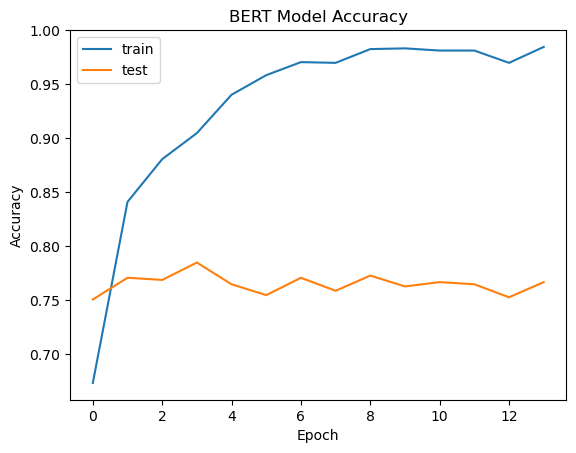

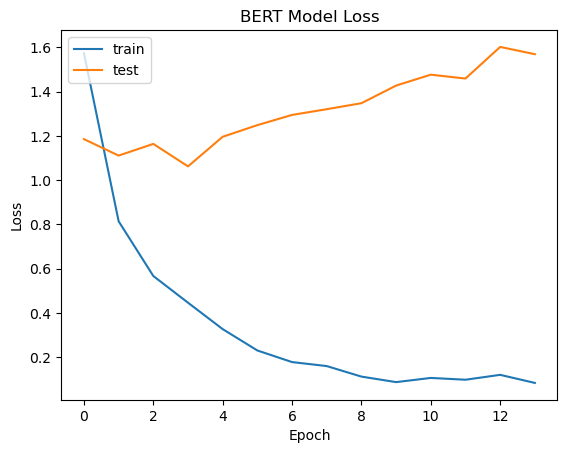

In [115]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BERT Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BERT Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
pred = model_bert.predict([test_input_ids, test_attention_masks])

16/16 [==============================] - 7s 263ms/step


In [98]:
pred = np.argmax(pred, axis = 1)

In [99]:
print(f"BERT f1 score : {f1_score(pred,y_test_bert, average= 'micro')}")
print(f"BERT recall score: {recall_score(pred,y_test_bert, average = 'micro')}")
print(f"BERT precision score: {precision_score(pred,y_test_bert, average = 'micro')}")
print(f"BERT Accuracy Score: {accuracy_score(pred,y_test_bert)}")


BERT f1 score : 0.7706237424547285
BERT recall score: 0.7706237424547284
BERT precision score: 0.7706237424547284
BERT Accuracy Score: 0.7706237424547284


In [100]:
class_names = [
    'HR',
    'DESIGNER',
    'INFORMATION-TECHNOLOGY',
    'TEACHER',
    'ADVOCATE',
    'BUSINESS-DEVELOPMENT',
    'HEALTHCARE',
    'FITNESS',
    'AGRICULTURE',
    'BPO',
    'SALES',
    'CONSULTANT',
    'DIGITAL-MEDIA',
    'AUTOMOBILE',
    'CHEF',
    'FINANCE',
    'APPAREL',
    'ENGINEERING',
    'ACCOUNTANT',
    'CONSTRUCTION',
    'PUBLIC-RELATIONS',
    'BANKING',
    'ARTS',
    'AVIATION'
]


In [101]:
report = classification_report(y_test_bert, pred)

In [102]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        20
           2       0.77      0.79      0.78        29
           3       0.89      0.92      0.91        26
           4       0.88      0.67      0.76        33
           5       0.93      1.00      0.96        27
           6       0.64      0.84      0.73        19
           7       0.51      0.72      0.60        25
           8       1.00      0.44      0.62         9
           9       1.00      0.12      0.22         8
          10       0.86      0.95      0.90        20
          11       0.78      0.93      0.85        15
          12       0.83      0.77      0.80        26
          13       0.18      0.20      0.19        10
          14       0.95      0.75      0.84        28
          15       1.00      1.00      1.00        20
          16       0.38      0.28      0.32        18
          17       0.76    

**Here, we can see BERT performs well on most classes however it struggles in predicting class No - 9 ,13 and 16 which corresponds to 'BPO' , 'AUTOMOBILE' and 'APPAREL'**

In [112]:
resume['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [113]:
resume['Category'].value_counts()[['APPAREL','AUTOMOBILE', 'BPO']]

APPAREL       97
AUTOMOBILE    36
BPO           22
Name: Category, dtype: int64

**You can see it contains less instances. That is why the model performance is  worse in these classes that other classes.**

In [103]:
category_labels_swapped = {
    0: 'HR',
    1: 'DESIGNER',
    2: 'INFORMATION-TECHNOLOGY',
    3: 'TEACHER',
    4: 'ADVOCATE',
    5: 'BUSINESS-DEVELOPMENT',
    6: 'HEALTHCARE',
    7: 'FITNESS',
    8: 'AGRICULTURE',
    9: 'BPO',
    10: 'SALES',
    11: 'CONSULTANT',
    12: 'DIGITAL-MEDIA',
    13: 'AUTOMOBILE',
    14: 'CHEF',
    15: 'FINANCE',
    16: 'APPAREL',
    17: 'ENGINEERING',
    18: 'ACCOUNTANT',
    19: 'CONSTRUCTION',
    20: 'PUBLIC-RELATIONS',
    21: 'BANKING',
    22: 'ARTS',
    23: 'AVIATION'
}


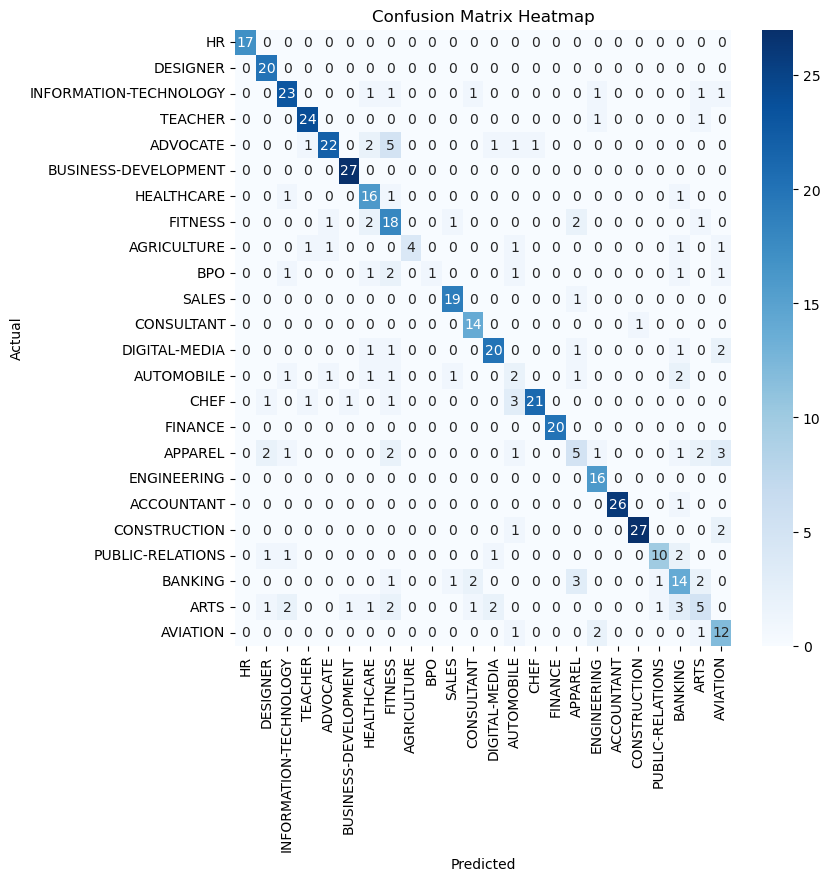

In [104]:
conf_matrix = confusion_matrix(y_test_bert, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels= category_labels_swapped.values(), yticklabels= category_labels_swapped.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [105]:
model_bert.evaluate([test_input_ids,test_attention_masks], y_test_bert, batch_size=8)


63/63 [==============================] - 5s 83ms/step - loss: 1.1095 - accuracy: 0.7706


[1.1094814538955688, 0.7706237435340881]

In [116]:
model_bert.save('bert_model.h5')
tokenizer.save_pretrained('bert_tokenizer')

('bert_tokenizer/tokenizer_config.json',
 'bert_tokenizer/special_tokens_map.json',
 'bert_tokenizer/vocab.txt',
 'bert_tokenizer/added_tokens.json')

### Loading and Testing BERT on actual data

In [86]:
from tensorflow.keras.models import load_model


In [88]:
def custom_objects_scope():
    return {'TFBertForSequenceClassification': TFBertForSequenceClassification}

# Load the Keras model with the custom object scope
loaded_model = tf.keras.models.load_model('/kaggle/working/bert_model.h5', custom_objects=custom_objects_scope())


In [100]:
input_text = X_test_bert[420]

In [101]:
y_test_bert[420]

3

In [95]:
inputs = tokenizer.encode_plus(
    input_text,
    add_special_tokens=True,
    max_length=100,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)

In [96]:
outputs = loaded_model.predict([inputs['input_ids'], inputs['attention_mask']])
predicted_class = outputs.argmax()
print("Predicted class:", predicted_class)

1/1 [==============================] - 3s 3s/step
Predicted class: 22


In [102]:
# loaded_model = load_model("/kaggle/working/bert_model.h5")

# Machine Learning

In [105]:
resume

,ID,Resume_str,Resume_html,Category,resume_removed_punc,resume_removed_stopwords,length,category_encoded
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...,hr administrator marketing associate hr admini...,510,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...,hr specialist us hr operations summary versati...,547,0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary over years experience in r...,hr director summary years experience recruitin...,712,0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven and dyn...,hr specialist summary dedicated driven dynamic...,266,0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...,hr manager skill highlights hr skills hr depar...,890,0
...,...,...,...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgt e non commissioned officer in charge ...,rank sgt e non commissioned officer charge bri...,493,23
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,government relations communications and organi...,government relations communications organizati...,656,23
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional profile it suppo...,geek squad agent professional profile support ...,182,23
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director office manager summary highly...,program director office manager summary highly...,529,23


train-test-split for ML

## Data processing and train-validation-test split

In [78]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(resume['resume_removed_stopwords'], resume['category_encoded'], test_size= 0.4, random_state= 42)

In [79]:
X_test_ml, X_val_ml, y_test_ml, y_val_ml = train_test_split(X_test_ml, y_test_ml, test_size= 0.5, random_state= 42)

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In ML, we have to count vectorize the input texts. That is why TFIDF technique is used.
Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing and information retrieval to quantify the importance of terms in a collection of documents. It aims to capture the significance of a word in a document relative to its frequency across a collection of documents.

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(X_train_ml)
test_vectors = vectorizer.transform(X_test_ml)
     

## SVM

In [82]:
classifier_linear = SVC(kernel='linear')

In [83]:
classifier_linear.fit(train_vectors, y_train_ml)

SVC(kernel='linear')

In [84]:
pred = classifier_linear.predict(test_vectors)

In [85]:
accuracy_score(pred, y_test_ml)

0.5915492957746479